<a href="https://www.kaggle.com/code/sudhanshu2198/churn-modelling-with-multiple-classifiers?scriptVersionId=91442140" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/churn-modelling/Churn_Modelling.csv


In [2]:
data=pd.read_csv("../input/churn-modelling/Churn_Modelling.csv")

In [3]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [7]:
data.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

RowNumber,CustomerId,Surname are not useful we are going to drop them

In [8]:
data.drop(["RowNumber","CustomerId","Surname"],axis=1,inplace=True)

**Visualization**

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [10]:
mutual_info=data.corr()["Exited"].sort_values(ascending=False)
mutual_info

Exited             1.000000
Age                0.285323
Balance            0.118533
EstimatedSalary    0.012097
HasCrCard         -0.007138
Tenure            -0.014001
CreditScore       -0.027094
NumOfProducts     -0.047820
IsActiveMember    -0.156128
Name: Exited, dtype: float64

<AxesSubplot:>

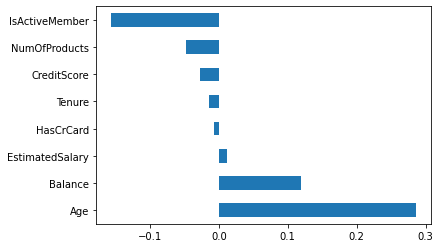

In [11]:
mutual_info[1:].plot(kind="barh")

<AxesSubplot:xlabel='Exited', ylabel='count'>

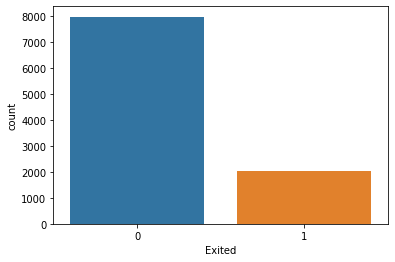

In [12]:
sns.countplot(x=data["Exited"])

Imbalanced Datasets

<AxesSubplot:xlabel='Gender', ylabel='count'>

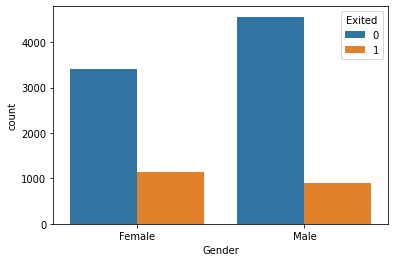

In [13]:
sns.countplot(x="Gender",hue="Exited",data=data)

<AxesSubplot:xlabel='Geography', ylabel='count'>

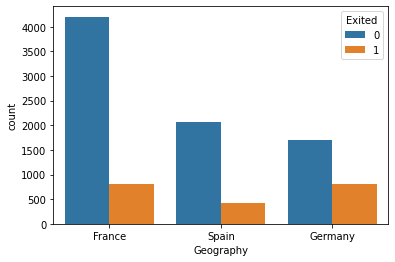

In [14]:
sns.countplot(x="Geography",hue="Exited",data=data)

<AxesSubplot:xlabel='IsActiveMember', ylabel='count'>

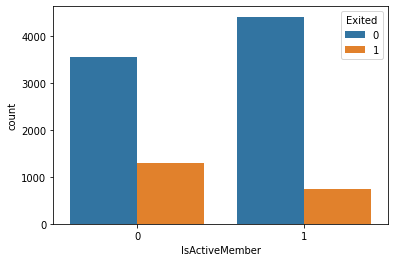

In [15]:
sns.countplot(x="IsActiveMember",hue="Exited",data=data)

<AxesSubplot:xlabel='NumOfProducts', ylabel='count'>

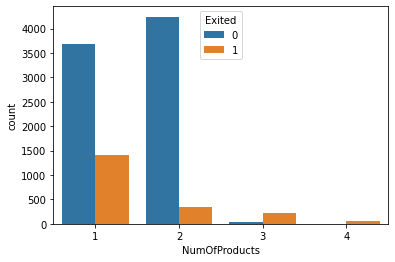

In [16]:
sns.countplot(x="NumOfProducts",hue="Exited",data=data)

<AxesSubplot:xlabel='Exited', ylabel='EstimatedSalary'>

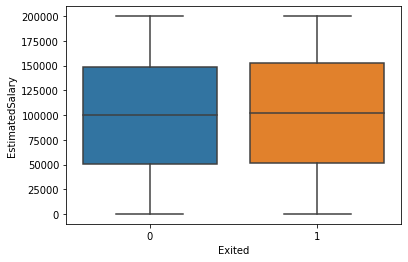

In [17]:
sns.boxplot(y="EstimatedSalary",x="Exited",data=data)

<AxesSubplot:xlabel='Exited', ylabel='Balance'>

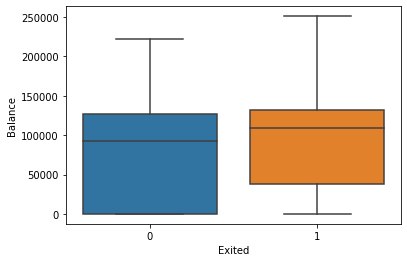

In [18]:
sns.boxplot(y="Balance",x="Exited",data=data)

<AxesSubplot:xlabel='Age', ylabel='Count'>

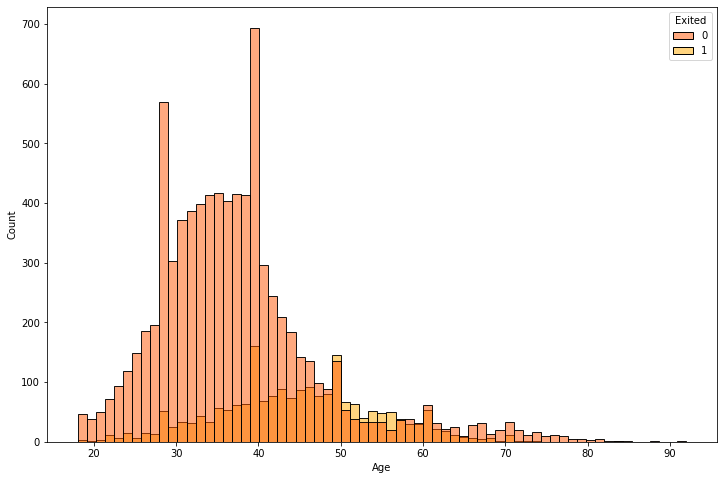

In [19]:
plt.figure(figsize=(12,8))
sns.histplot(x="Age",hue="Exited",data=data,palette="autumn")

<AxesSubplot:xlabel='Exited', ylabel='Age'>

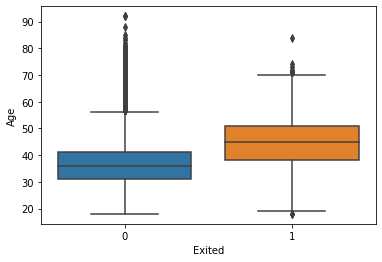

In [20]:
sns.boxplot(y="Age",x="Exited",data=data)


**Age column have outliers that's has to be removed**

<AxesSubplot:xlabel='CreditScore', ylabel='Count'>

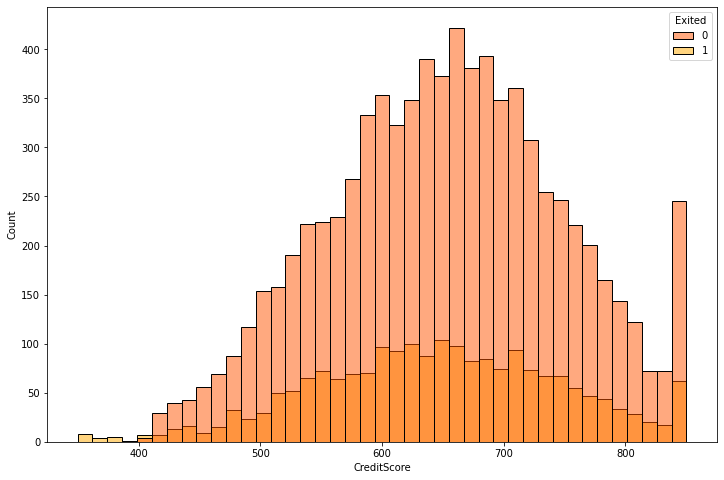

In [21]:
plt.figure(figsize=(12,8))
sns.histplot(x="CreditScore",hue="Exited",data=data,palette="autumn")

In [22]:
Cat_Age=pd.cut(x=data["CreditScore"],bins=5)

<AxesSubplot:xlabel='CreditScore', ylabel='count'>

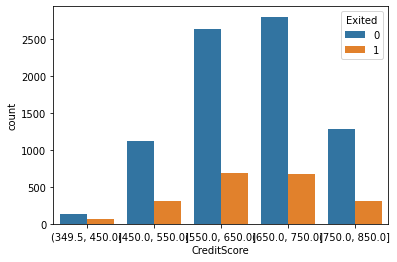

In [23]:
sns.countplot(x=Cat_Age,hue=data["Exited"])

**Data Preprocessing**

In [24]:
categorical_col=[col for col in data.columns if data[col].dtype=="object" and data[col].nunique()<10]
categorical_col

['Geography', 'Gender']

In [25]:
data=pd.get_dummies(data,drop_first=True)

In [26]:
data.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


Outlier removal in age column

In [27]:
q25=np.quantile(data["Age"],0.25)
q75=np.quantile(data["Age"],0.75)

iqr=q75-q25

lower=q25-1.5*iqr
upper=q75+1.5*iqr

print('The IQR is',iqr)
print('The lower bound value is', lower)
print('The upper bound value is', upper)

The IQR is 12.0
The lower bound value is 14.0
The upper bound value is 62.0


In [28]:
data=data[(data["Age"]<upper)&(data["Age"]>lower)]

In [29]:
X=data.drop("Exited",axis=1)
y=data["Exited"]

In [30]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [32]:
scale=StandardScaler()
train=scale.fit_transform(X_train)
test=scale.transform(X_test)

In [33]:
X_train=pd.DataFrame(train,columns=X_train.columns)
X_test=pd.DataFrame(test,columns=X_test.columns)

Balancing Dataset

In [34]:
X_train.shape

(7671, 11)

In [35]:
from imblearn.over_sampling import SMOTE
oversampling=SMOTE()
X_train,y_train=oversampling.fit_resample(X_train,y_train)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Exited', ylabel='count'>

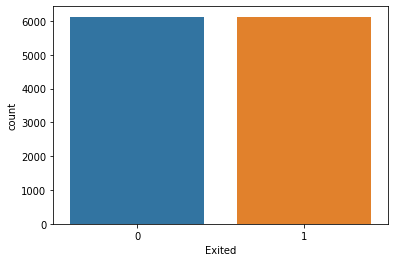

In [36]:
sns.countplot(y_train)

In [37]:
X_train.shape

(12256, 11)

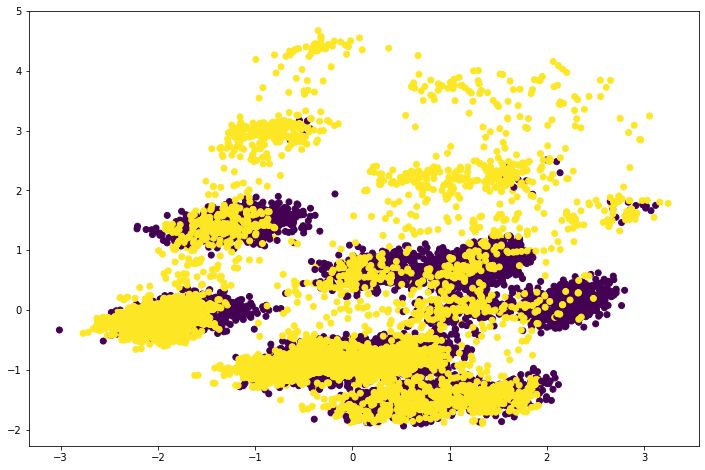

In [38]:
plt.figure(figsize=(12,8))
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
Xt = pca.fit_transform(X_train)
plot = plt.scatter(Xt[:,0], Xt[:,1], c=y_train)

**Modelling**

In [39]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report

**Gaussian Naive Bayes Classifier**

In [40]:
from sklearn.linear_model import LogisticRegression

In [41]:
model=LogisticRegression()
model.fit(X_train,y_train)
pred=model.predict(X_test)

print(confusion_matrix(y_test,pred))
print("\n\n")
print(classification_report(y_test,pred))

[[1119  399]
 [ 108  292]]



              precision    recall  f1-score   support

           0       0.91      0.74      0.82      1518
           1       0.42      0.73      0.54       400

    accuracy                           0.74      1918
   macro avg       0.67      0.73      0.68      1918
weighted avg       0.81      0.74      0.76      1918



**Support Vector Classifier**

In [42]:
from sklearn.svm import SVC

In [43]:
params={ "C":[0.001,0.01,0.1,1,10,100 ],
         "gamma": [0.001,0.01,0.1,1,10]}
        
model=SVC(kernel="rbf")

In [44]:
grid=GridSearchCV(model,params,cv=10)
grid.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'gamma': [0.001, 0.01, 0.1, 1, 10]})

In [45]:
grid.best_params_

{'C': 10, 'gamma': 1}

In [46]:
model=grid.best_estimator_
pred=model.predict(X_test)

In [47]:
print(confusion_matrix(y_test,pred))
print("\n\n")
print(classification_report(y_test,pred))

[[1350  168]
 [ 268  132]]



              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1518
           1       0.44      0.33      0.38       400

    accuracy                           0.77      1918
   macro avg       0.64      0.61      0.62      1918
weighted avg       0.75      0.77      0.76      1918



**Random Forest Classifier**

In [48]:
from sklearn.ensemble import RandomForestClassifier

In [49]:
params={"n_estimators":[100,150,200,250,300,350],
         "max_depth":[6,9,12,15,18,21],
       }

model=RandomForestClassifier(min_samples_leaf=10,n_jobs=-1)

In [50]:
grid=GridSearchCV(model,params,cv=10, scoring='neg_mean_squared_error')
grid.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=RandomForestClassifier(min_samples_leaf=10, n_jobs=-1),
             param_grid={'max_depth': [6, 9, 12, 15, 18, 21],
                         'n_estimators': [100, 150, 200, 250, 300, 350]},
             scoring='neg_mean_squared_error')

In [51]:
grid.best_params_

{'max_depth': 18, 'n_estimators': 300}

In [52]:
model=grid.best_estimator_
pred=model.predict(X_test)

In [53]:
print(confusion_matrix(y_test,pred))
print("\n\n")
print(classification_report(y_test,pred))

[[1298  220]
 [ 126  274]]



              precision    recall  f1-score   support

           0       0.91      0.86      0.88      1518
           1       0.55      0.69      0.61       400

    accuracy                           0.82      1918
   macro avg       0.73      0.77      0.75      1918
weighted avg       0.84      0.82      0.83      1918

